# Using Real World Images
[텐서플로: 영향력이 큰 어려운 문제들을 해결하는 ML 플랫폼](https://www.youtube.com/watch?v=NlpS-DhayQA)<br>
=>in disease detection with the Cassava plant by ML or DNN

파일 다운로드 : https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip<br>
validation 파일 다운로드 : https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip<br>
Colab Git : https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb

In [1]:
import os 
import zipfile

local_zip='./horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
if not os.path.isdir('./horse-or-human'):
    zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [2]:
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
                               
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [3]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index=0

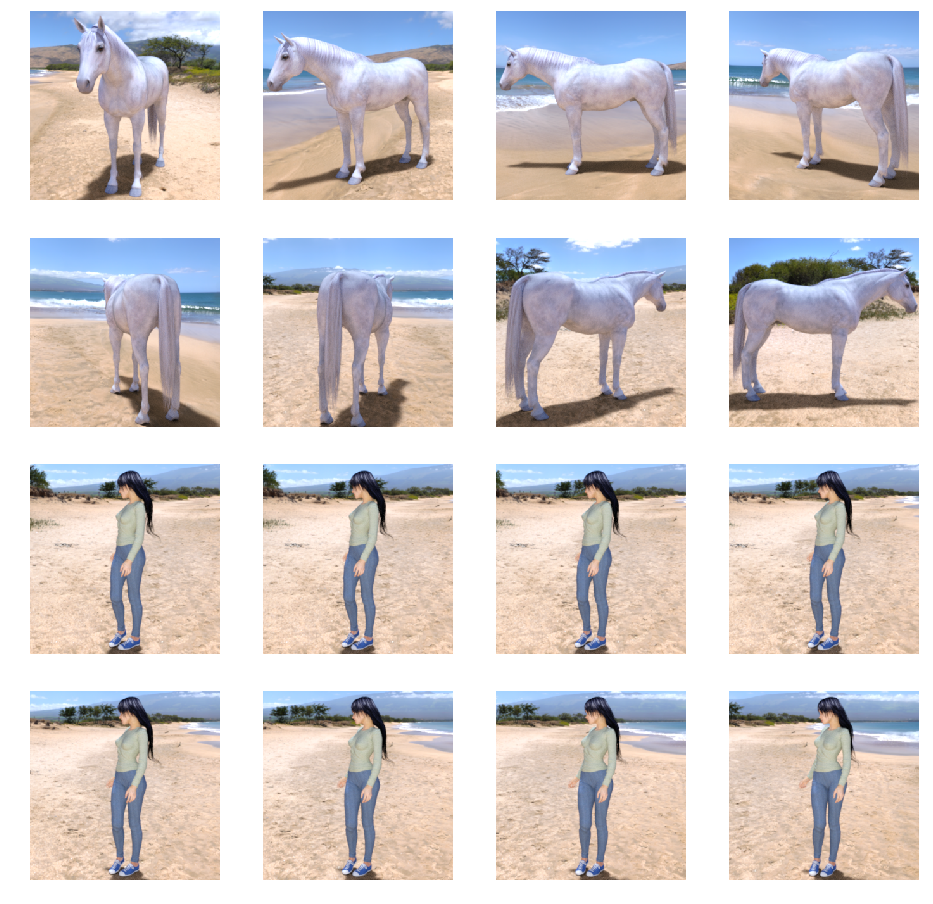

In [5]:
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
    sp=plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [6]:
next_horse_pix

['./horse-or-human/horses\\horse01-0.png',
 './horse-or-human/horses\\horse01-1.png',
 './horse-or-human/horses\\horse01-2.png',
 './horse-or-human/horses\\horse01-3.png',
 './horse-or-human/horses\\horse01-4.png',
 './horse-or-human/horses\\horse01-5.png',
 './horse-or-human/horses\\horse01-6.png',
 './horse-or-human/horses\\horse01-7.png']

In [7]:
import tensorflow as tf

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
"""
parameter cal : [(filter_width * filter_height)*channel before +1(bias)] * channel after
ex) 
first conv2d : [(3*3)*3 +1]*16 = 448
second conv2d : [(3*3)*16+1]*32 = 4640
third conv2d : [(3*3)*32+1]*64= 18496 ...etc
"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

'\nparameter cal : [(filter_width * filter_height)*channel before +1(bias)] * channel after\nex) \nfirst conv2d : [(3*3)*3 +1]*16 = 448\nsecond conv2d : [(3*3)*16+1]*32 = 4640\nthird conv2d : [(3*3)*32+1]*64= 18496 ...etc\n'

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',#train_dir
    target_size=(300,300),
    batch_size=64,
    class_mode='binary')#horse or human

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 0.7864 - acc: 0.6432
Epoch 2/15
8/8 [==============================] - 1s 153ms/step - loss: 0.5425 - acc: 0.7188
Epoch 3/15
8/8 [==============================] - 3s 373ms/step - loss: 0.8887 - acc: 0.7812
Epoch 4/15
8/8 [==============================] - 3s 323ms/step - loss: 0.3602 - acc: 0.7966
Epoch 5/15
8/8 [==============================] - 3s 360ms/step - loss: 0.2472 - acc: 0.8926
Epoch 6/15
8/8 [==============================] - 2s 305ms/step - loss: 0.4218 - acc: 0.8811
Epoch 7/15
8/8 [==============================] - 3s 353ms/step - loss: 0.4299 - acc: 0.8867
Epoch 8/15
8/8 [==============================] - 3s 313ms/step - loss: 0.0802 - acc: 0.9703
Epoch 9/15
3/8 [==========>...................] - ETA: 1s - loss: 0.0413 - acc: 0.9896

KeyboardInterrupt: 

```python
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")
```

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

```python
import os, signal
os.kill(os.getpid(), signal.SIGKILL)
```

Colab Git 2 : https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb

In [ ]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
if not os.path.isdir('./horse-or-human'):
    zip_ref.extractall('./horse-or-human')
if not os.path.isdir('./validation-horse-or-human'):
    zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,    
    validation_data=validation_generator,
    validation_steps=8,
    verbose=2)

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

```python
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")
```

Colab 3 : https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%204%20-%20Notebook.ipynb<br>
You can see that training times will improve, but that some classifications might be wrong! Experiment with different sizes -- you don’t have to use 150x150 for example!

```python
import os, signal
os.kill(os.getpid(), signal.SIGKILL)
```

[Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)<br>
[tf.train.RMSPropOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer)<br>
[Binary Classification (C1W2L01)](https://www.youtube.com/watch?v=eqEc66RFY0I&t=6s)<br>

#  Week 4 Quiz - Guess
 1. Using Image Generator, how do you label images?
 > Option : You have to manually do it, It’s based on the directory the image is contained in, TensorFlow figures it out from the contents, It’s based on the file name
 >> It’s based on the directory the image is contained in
 2. What method on the Image Generator is used to normalize the image?
 > Option : normalize, normalize_image, rescale, Rescale_image
 >> rescale
 3. How did we specify the training size for the images?
 > Option : The target_size parameter on the validation generator, The target_size parameter on the training generator, The training_size parameter on the training generator, The training_size parameter on the validation generator
 >> The training_size parameter on the training generator
 4. When we specify the input_shape to be (300, 300, 3), what does that mean?
 > Option : There will be 300 horses and 300 humans, loaded in batches of 3, Every Image will be 300x300 pixels, with 3 bytes to define color, Every Image will be 300x300 pixels, and there should be 3 Convolutional Layers, There will be 300 images, each size 300, loaded in batches of 3
 >> Every Image will be 300x300 pixels, with 3 bytes to define color
 5. If your training data is close to 1.000 accuracy, but your validation data isn’t, what’s the risk here?
 > Option : You’re overfitting on your training data, No risk, that’s a great result, You’re underfitting on your validation data, You’re overfitting on your validation data
 >> You’re overfitting on your training data
 6. Convolutional Neural Networks are better for classifying images like horses and humans because:
 > Option : In these images, the features may be in different parts of the frame, There’s a wide variety of horses, There’s a wide variety of humans, All of the above
 >> All of the above
 - After reducing the size of the images, the training results were different. Why?
 > Option : We removed some convolutions to handle the smaller images, There was more condensed information in the images, There was less information in the images, The training was faster
 >> There was less information in the images

### 위에서 주소로 남긴 Colab과 같은 소스가 GitHub에 들어있는 것
GitHub 1: https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb<br>
GitHub 2: https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb<br>
GitHub 3: https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%204%20-%20Notebook.ipynb<br>

# Exercise4 - Question
Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.<br>
Answer Colabe : https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Exercises/Exercise%204%20-%20Handling%20Complex%20Images/Exercise4-Answer.ipynb#scrollTo=eUcNTpra1FK0

```python
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(# Your Code):
  # Your Code

callbacks = myCallback()

# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
])

from tensorflow.keras.optimizers import RMSprop

model.compile(# Your Code Here #)
    
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = # Your Code Here

train_generator = train_datagen.flow_from_directory(
        # Your Code Here)

# Expected output: 'Found 80 images belonging to 2 classes'
    
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""
```

In [ ]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999
"""
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "./happy-or-sad.zip"
"""
zip_ref = zipfile.ZipFile("./happy-or-sad.zip", 'r')
if not os.path.isdir("./h-or-s"):
    zip_ref.extractall("./h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > DESIRED_ACCURACY:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training=True

callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])
    
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "./h-or-s",
    target_size=(150,150),
    batch_size=10,
    class_mode='binary'
)

# Expected output: 'Found 80 images belonging to 2 classes'
    
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""